## Dropout and convolution conceptions
苏康，2018-8-16

![dropout](./xxq/4.png)

In [1]:
# -*- coding: utf-8 -*-
###To overcome the overfitting problem,we can use the Dropout method
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.optimizers import RMSprop
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data",one_hot=True)
n_classes=10
####extract data
train_X,train_Y,test_X,test_Y=mnist.train.images,mnist.train.labels,\
mnist.test.images,mnist.test.labels

###establish train model
model=Sequential()
model.add(Dense(input_dim=28*28,output_dim=512,activation='relu',init='normal'))
model.add(Dropout(0.25))
model.add(Dense(input_dim=512,output_dim=256,init='normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(input_dim=256,output_dim=n_classes,activation='softmax',init='normal'))
model.summary()

Using TensorFlow backend.


TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

In [2]:
model.compile(optimizer=RMSprop(lr=0.001,rho=0.9),loss="categorical_crossentropy",\
              metrics=["accuracy"])

In [3]:
import time
s_time=time.time()
model.fit(train_X,train_Y,batch_size=128,epochs=30,verbose=1)
e_time=time.time()
print("program running time %.2f"%(e_time-s_time))

Epoch 1/30
55000/55000 [==============================] - 8s 152us/step - loss: 0.3258 - acc: 0.9014
Epoch 2/30
55000/55000 [==============================] - 8s 142us/step - loss: 0.1371 - acc: 0.9595
Epoch 3/30
55000/55000 [==============================] - 8s 137us/step - loss: 0.1009 - acc: 0.9708
Epoch 4/30
55000/55000 [==============================] - 8s 147us/step - loss: 0.0840 - acc: 0.9755
Epoch 5/30
55000/55000 [==============================] - 7s 134us/step - loss: 0.0709 - acc: 0.9788
Epoch 6/30
55000/55000 [==============================] - 7s 132us/step - loss: 0.0619 - acc: 0.9822
Epoch 7/30
55000/55000 [==============================] - 8s 154us/step - loss: 0.0557 - acc: 0.9842
Epoch 8/30
55000/55000 [==============================] - 7s 136us/step - loss: 0.0502 - acc: 0.9859
Epoch 9/30
55000/55000 [==============================] - 7s 135us/step - loss: 0.0450 - acc: 0.9878 0s - loss: 0.0452 - ac
Epoch 10/30
55000/55000 [==============================] - 7s 136us/

In [5]:
evaluation=model.evaluate(test_X,test_Y,batch_size=128,verbose=0)
print("loss on test datasets: %.4f"%(evaluation[0]),"accuracy on test datasets: \
%.4f"%(evaluation[1]))

loss on test datasets: 0.1226 accuracy on test datasets: 0.9838


#### 至今为止，我们都是把手写字体图像的每个像素作为特征来训练的！到现在都没考虑到图像的一些特征(如细节轮廓，边缘等等)，为了把这些特征提出出来，我们可以采用卷积神经网络(CNN)
1. 什么是卷积计算？
2. 为什么卷积可以得到图像的特征？
3. 卷积神经网络(CNN)的卷积和池化作用(权值共享和平移旋转不变性）

In [1]:
import numpy as np
from scipy.signal import convolve2d

In [2]:
? np.convolve

In [3]:
a=np.array([1,2,3])
b=np.array([1,0,4])
c=np.convolve(a,b)
c1=np.convolve(b,a)
d=np.convolve(a,b,'same')
e=np.convolve(b,a,'same')
f=np.convolve(a,b,'valid')
print(c,c1,d,e,f)

[ 1  2  7  8 12] [ 1  2  7  8 12] [2 7 8] [2 7 8] [7]


#### 一维卷积运算满足交换律,请理解参数"same"和"valid"的含义

In [4]:
###二维卷积
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
f1=np.array([[0,0,0],[1,0,-1],[0,0,0]])
f2=np.array([[0,1,0],[0,0,0],[0,-1,0]])
c=convolve2d(a,f1)
d=convolve2d(a,f1,'same')
e=convolve2d(a,f1,'valid')
print(c,'\n\n',d,'\n\n',e)

[[ 0  0  0  0  0]
 [ 1  2  2 -2 -3]
 [ 4  5  2 -5 -6]
 [ 7  8  2 -8 -9]
 [ 0  0  0  0  0]] 

 [[ 2  2 -2]
 [ 5  2 -5]
 [ 8  2 -8]] 

 [[2]]


In [5]:
c=convolve2d(a,f2)
d=convolve2d(a,f2,'same')
e=convolve2d(a,f2,'valid')
print(c,'\n\n',d,'\n\n',e)

[[ 0  1  2  3  0]
 [ 0  4  5  6  0]
 [ 0  6  6  6  0]
 [ 0 -4 -5 -6  0]
 [ 0 -7 -8 -9  0]] 

 [[ 4  5  6]
 [ 6  6  6]
 [-4 -5 -6]] 

 [[6]]


In [6]:
###图像的二维卷积
import matplotlib.pyplot as plt
import matplotlib.image as img
img=img.imread('panda.jpg')
plt.imshow(img,cmap='gray')

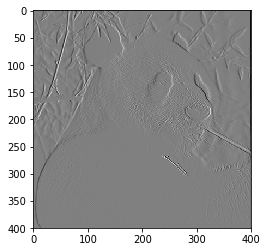

In [7]:
###水平滤波
img_f=img.astype(np.float32)##or img_f=img.astype("float32")
img_filted_1=convolve2d(img_f,f1,'same')
plt.imshow(img_filted_1,cmap='gray')

### 滤波算子
这里 f1 相当于一个水平滤波器，可以提取图像在x方向(横向)的梯度变化

$I=\left[
  \begin{array}{ccc}    
    g(x-1,y-1),g(x,y-1),g(x+1,y-1)\\
    g(x-1,y),g(x,y),g(x+1,y)\\
    g(x-1,y+1),g(x,y+1),g(x+1,y+1)
  \end{array}\right]$
  
这里 $g$ 表示灰度值(grayvalue)，$I$ 表示图像(Image)
  
在一个图像两个像素点 $g(x)$ 和 $g(x+h)$，在水平方向上的灰度值的梯度可以表示为：

$$\frac{\partial I(x,y)}{\partial x}=\lim_{h\rightarrow0} \frac{g(x+h)-g(x)}{h}$$

其中，$h$ 表示像素间隔,如若取 $h=1$，则上式可视为二维信号卷积上了这样一个滤波算子：


$filter=\left[
  \begin{array}{ccc}    
    0,0,0\\
    0,1,-1\\
    0,0,0
  \end{array}\right]$
  
同理：$$\frac{\partial I(x,y)}{\partial x}= \lim_{h\rightarrow0} \frac{g(x+1)-g(x-1)}{2}\propto {g(x+1)-g(x-1)} $$

这可视为二维信号卷积上了如下一个滤波算子：


$filter=\left[
  \begin{array}{ccc}    
    0,0,0\\
    1,0,-1\\
    0,0,0
  \end{array}\right]$
  
最后：一个经典的Sobel边缘检测滤波器为：

$H_x=\left[
  \begin{array}{ccc}    
    1,0,-1\\
    2,0,-2\\
    1,0,-1
  \end{array}\right]=\left[
  \begin{array}{ccc}    
    1\\
    2\\
    1
  \end{array}\right]*\left[
  \begin{array}{c}    
    1  0 -1
  \end{array}\right]$
  
  $H_y=\left[
  \begin{array}{ccc}    
    -1,-2,-1\\
    0,0,0\\
    1,2,1
  \end{array}\right]$
  
  $H=\sqrt{{(f \ast H_x)}^2+{(f \ast H_y)}^2}$ ($\ast$表示卷积运算)

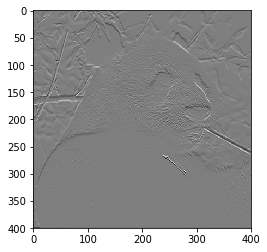

In [8]:
###纵向滤波
img_f=img.astype(np.float32)##or img_f=img.astype("float32")
img_filted_2=convolve2d(img_f,f2,'same')
plt.imshow(img_filted_2,cmap='gray')

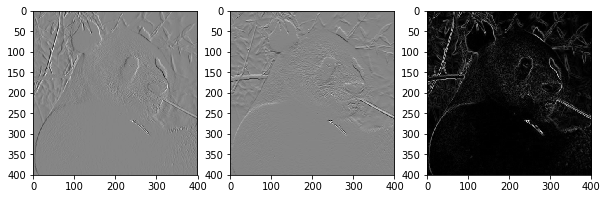

In [9]:
####Sobel edge detection
img_f=img.astype(np.float32)

hx=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

hy=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

fhx=convolve2d(img_f,hx,'same')

fhy=convolve2d(img_f,hy,'same')

f_sobel=(fhx*fhx+fhy*fhy)**0.5

f,a=plt.subplots(1,3,figsize=(10,6))

a[0].imshow(fhx,cmap='gray')
a[1].imshow(fhy,cmap='gray')
a[2].imshow(f_sobel,cmap='gray')

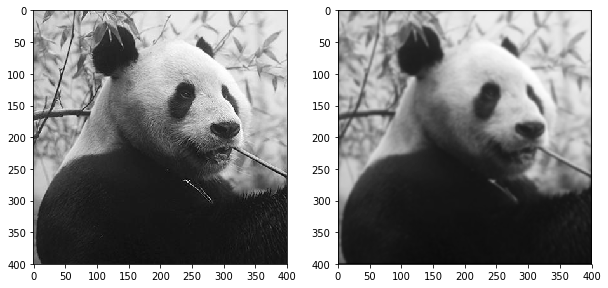

In [13]:
###Mean filter(均值滤波器)
f_average=np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
img_averaged=convolve2d(img_f,f_average,'same')
img_averaged=convolve2d(img_averaged,f_average,'same')
img_averaged=convolve2d(img_averaged,f_average,'same')
img_averaged=convolve2d(img_averaged,f_average,'same')

f,a=plt.subplots(1,2,figsize=(10,8))
a[0].imshow(img_f,cmap='gray')
a[1].imshow(img_averaged,cmap='gray')

#### 如果对图像处理感兴趣，可以自行设计高斯滤波器